In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle as pkl
tf.enable_eager_execution()

In [10]:
def load_metrics(loadpath):
    (losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions) = pkl.load(open(loadpath+'/metrics.pkl','rb'))
    global_epoch = pkl.load(open(loadpath+'/globalepoch.pkl','rb'))
    return(losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions),global_epoch

In [11]:
(losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions), global_epoch=load_metrics('LA_loss')

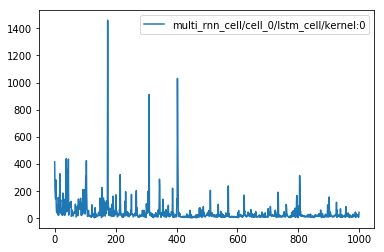

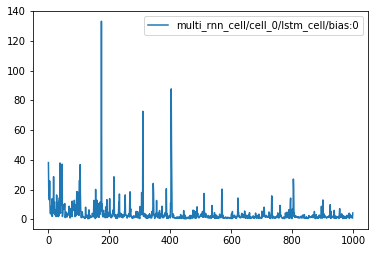

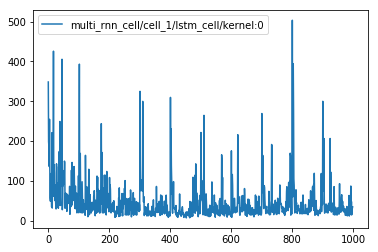

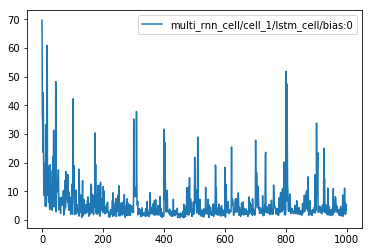

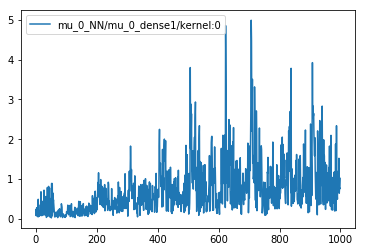

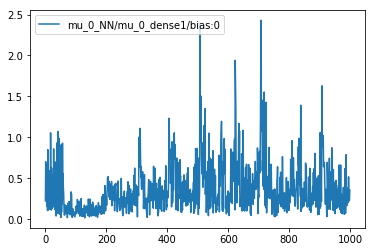

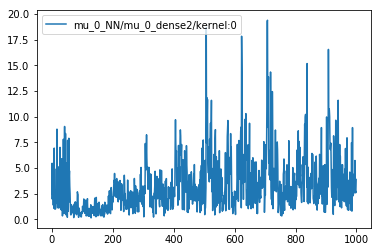

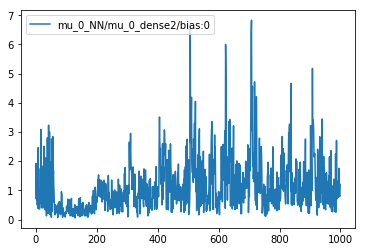

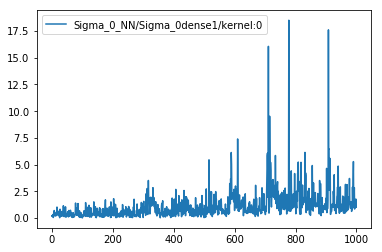

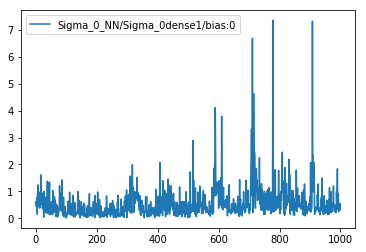

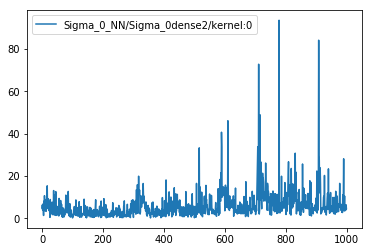

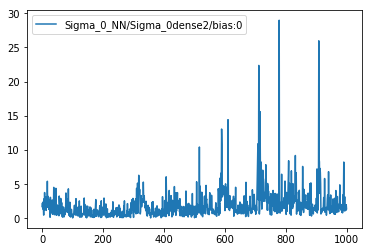

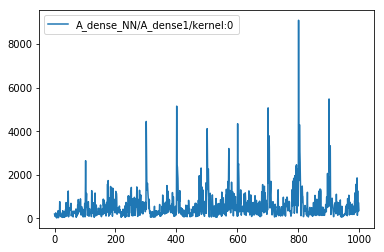

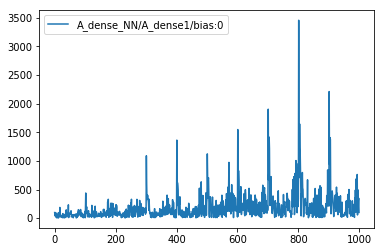

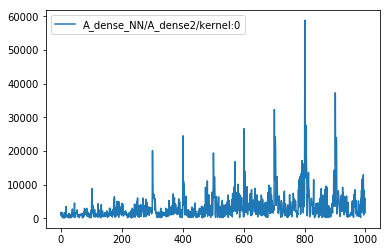

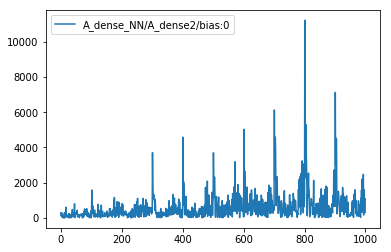

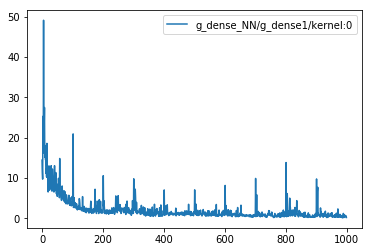

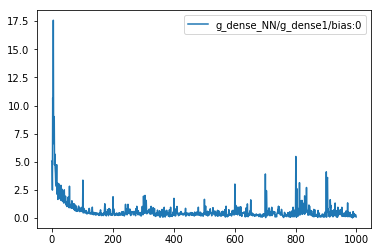

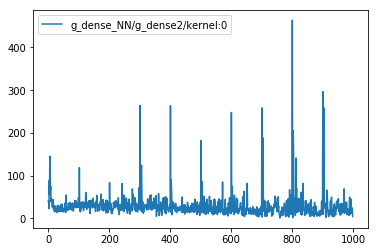

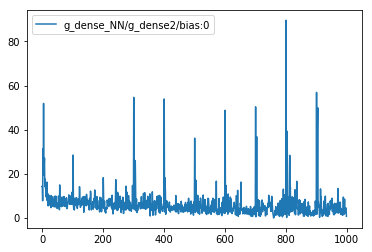

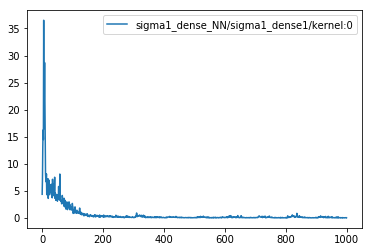

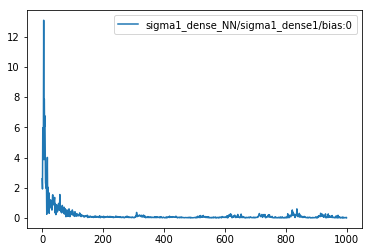

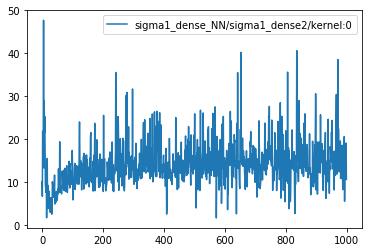

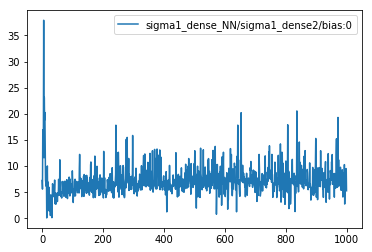

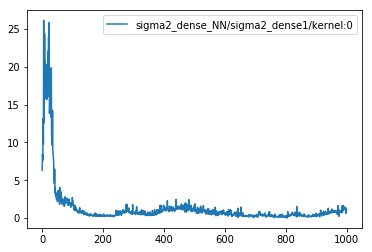

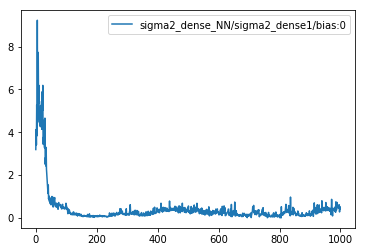

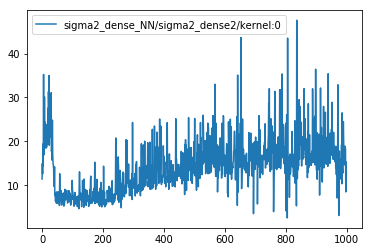

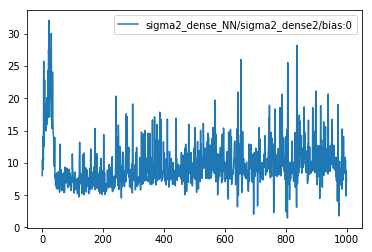

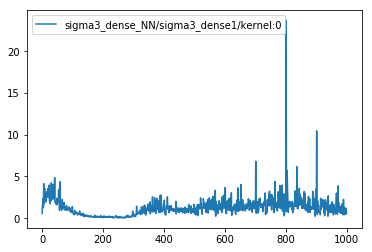

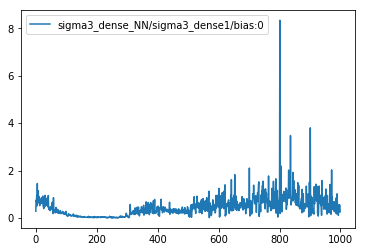

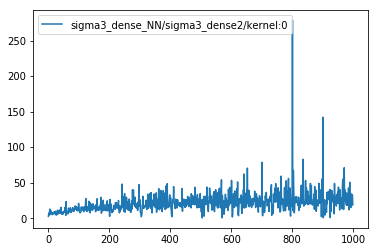

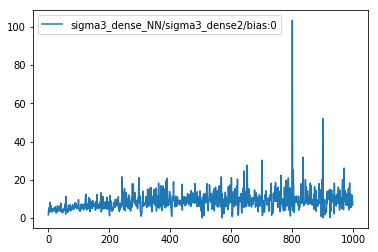

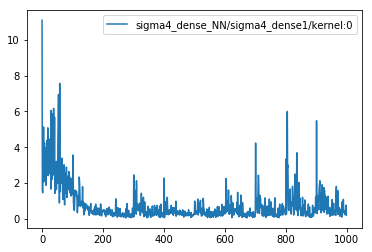

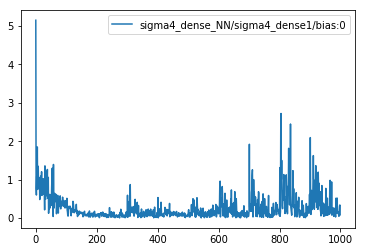

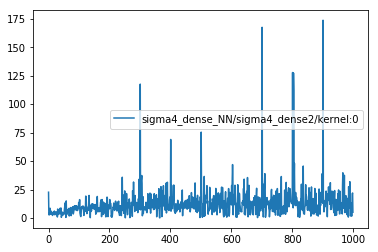

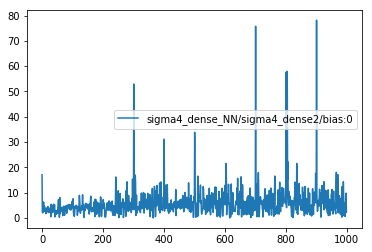

In [7]:
for var in grad_norms:
    plt.plot(var[1:], label = var[0])
    plt.legend()
    plt.show()

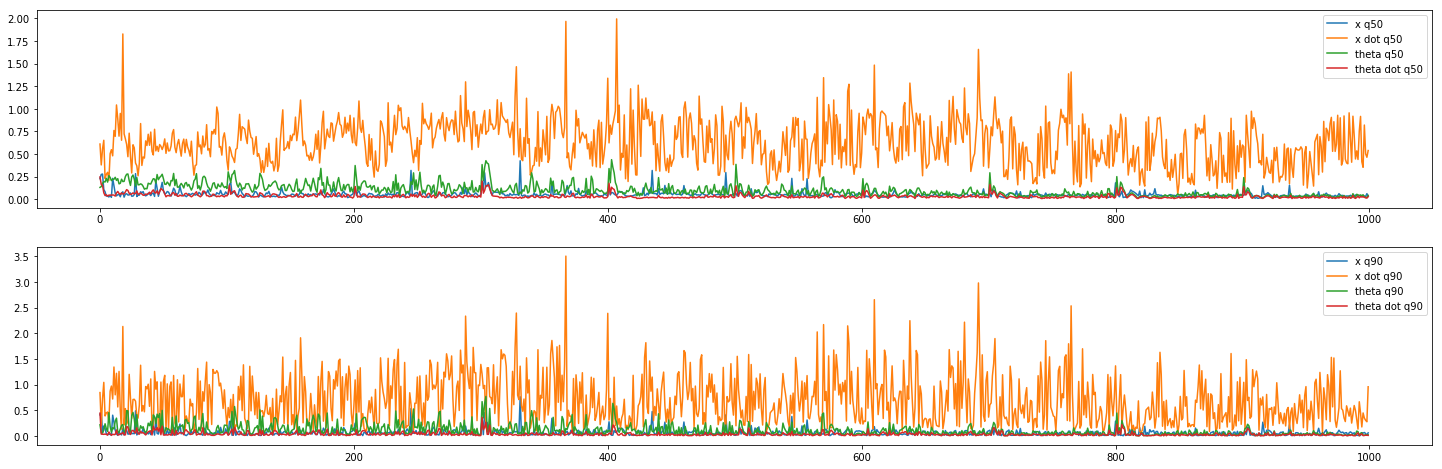

In [8]:
array_pq_losses = np.array(pq_losses).T
labels = ['x q50','x q90','x dot q50','x dot q90','theta q50','theta q90','theta dot q50','theta dot q90']
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (25,8))
for i in range(array_pq_losses.shape[0]):
    if i%2 == 0:
        ax1.plot(array_pq_losses[i], label = labels[i])
    else:
        ax2.plot(array_pq_losses[i], label = labels[i])
ax1.legend()
# ax1.set_ylim(0.0,2.0)
ax2.legend()
# ax2.set_ylim(0.0,2.0)
plt.show()

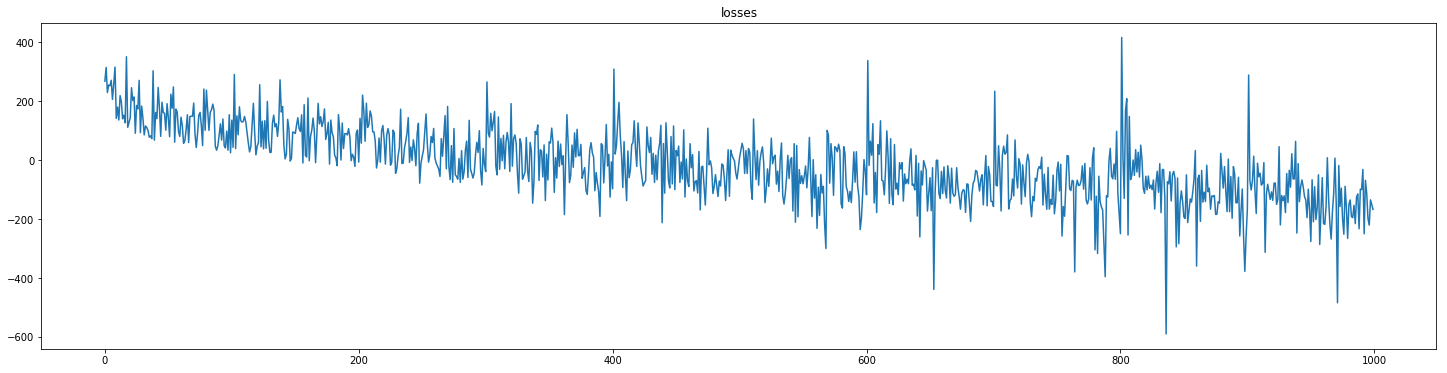

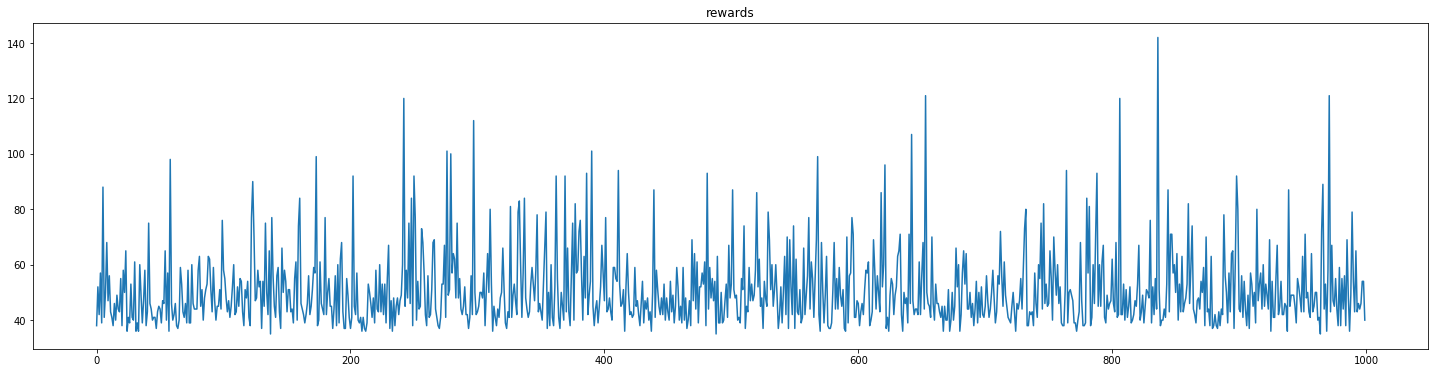

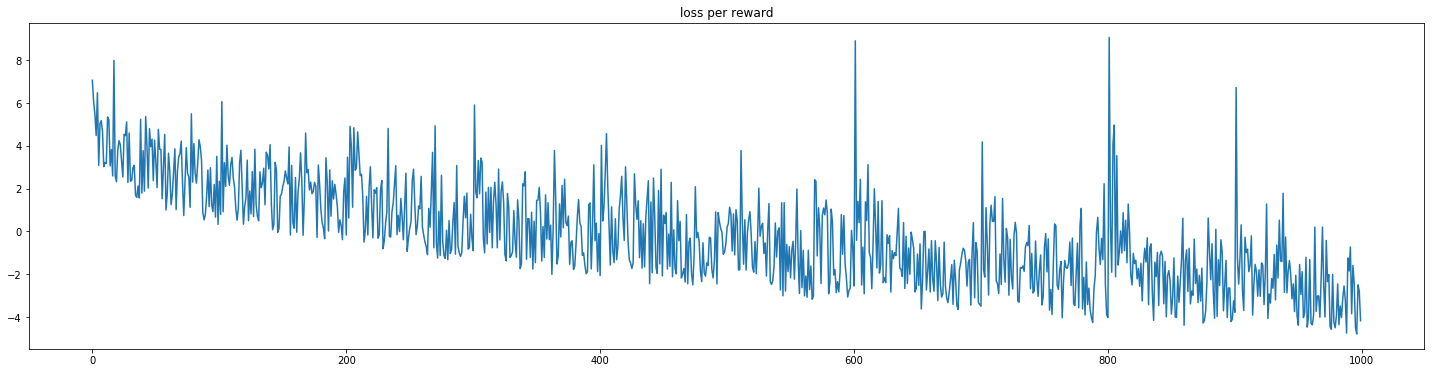

In [9]:
plt.figure(figsize=(25,6))
plt.plot(losses)
plt.title('losses')
plt.show()
plt.figure(figsize=(25,6))
plt.plot(rewards)
plt.title('rewards')
plt.show()
plt.figure(figsize=(25,6))
plt.plot([loss/reward for loss,reward in zip(losses,rewards)])
plt.title('loss per reward')
# plt.ylim(0,500)
plt.show()

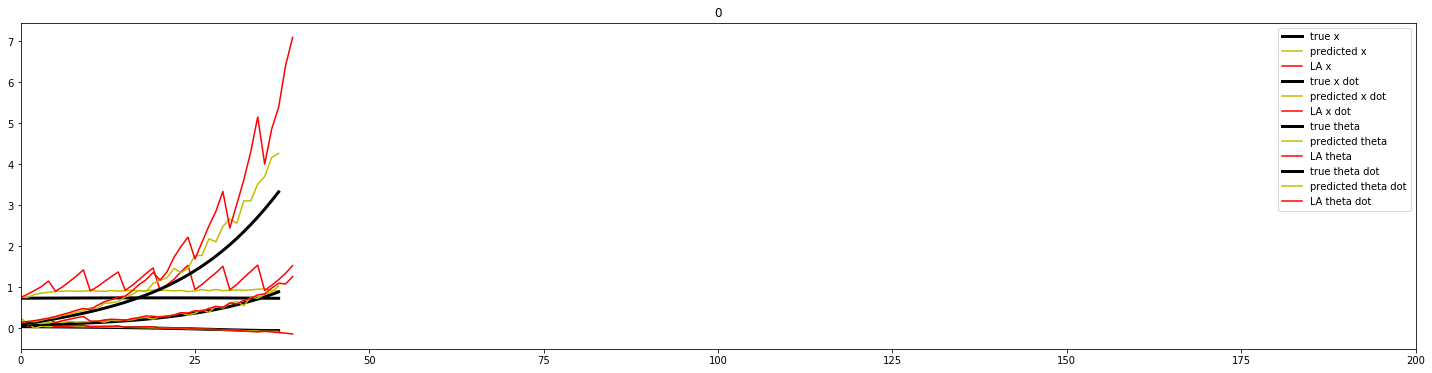

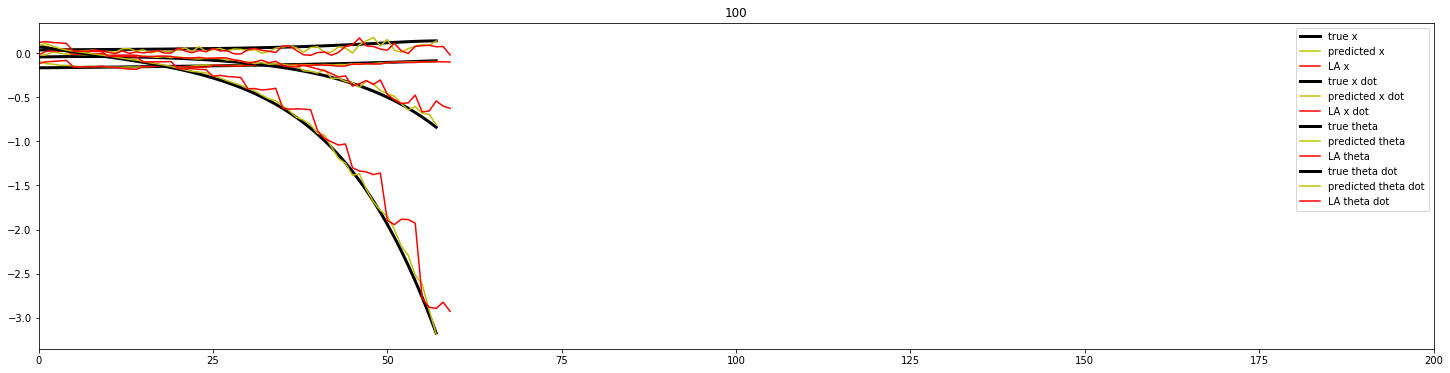

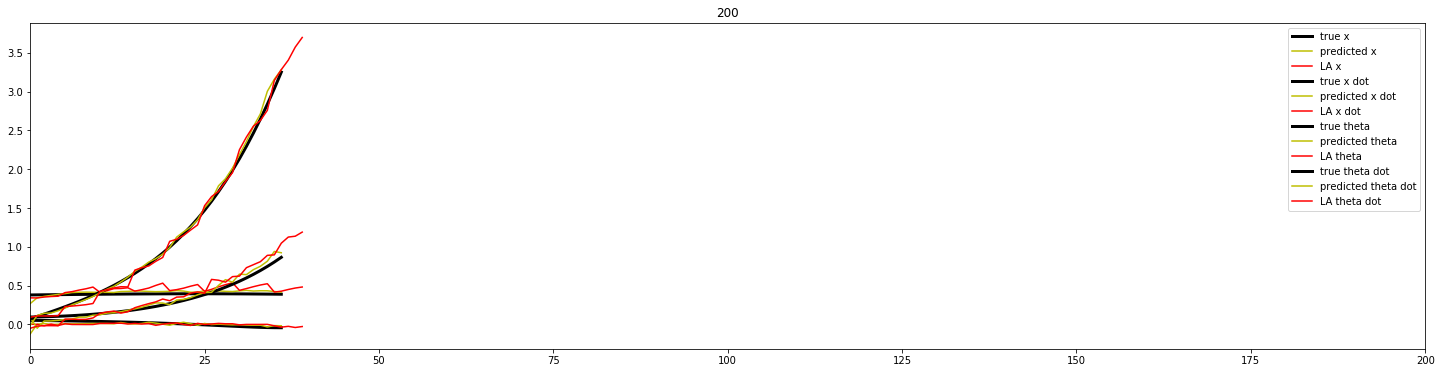

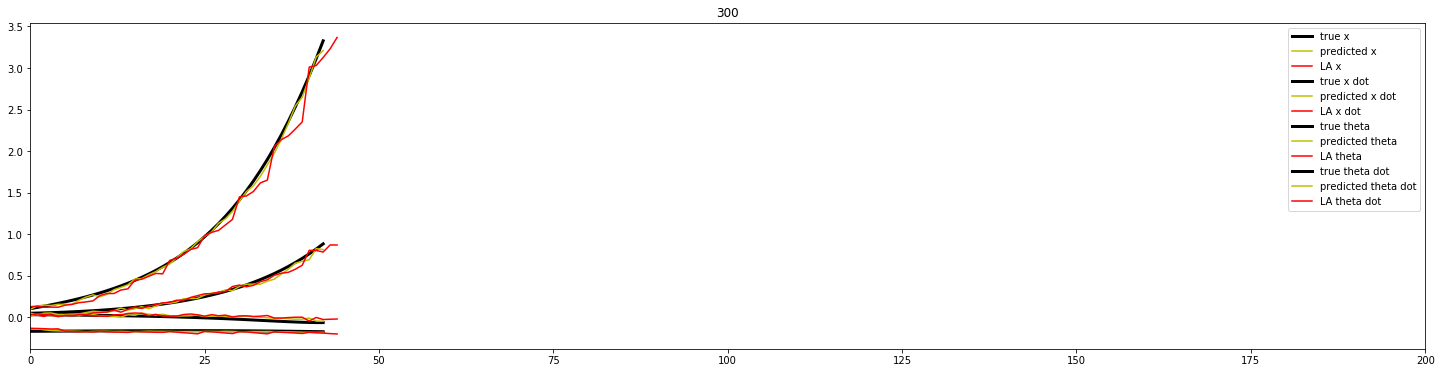

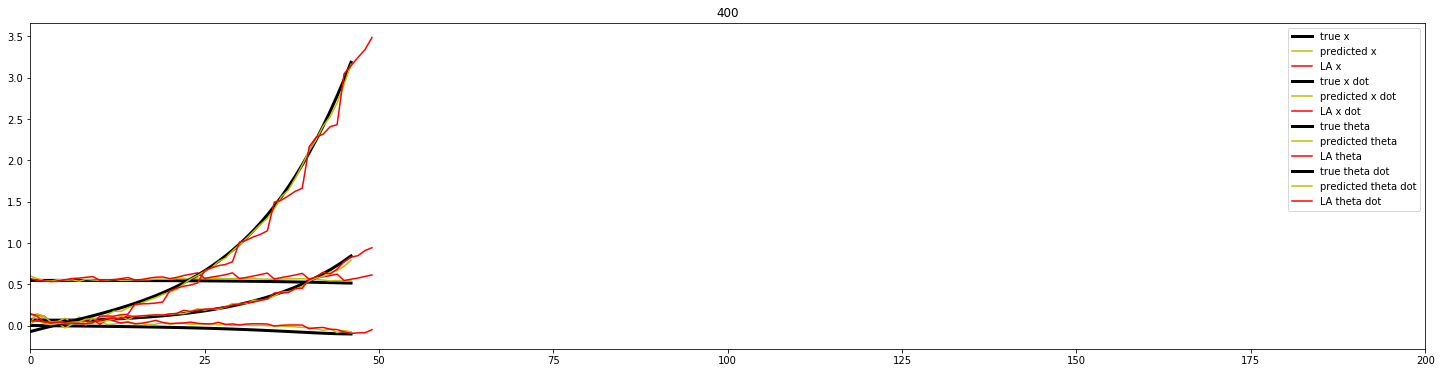

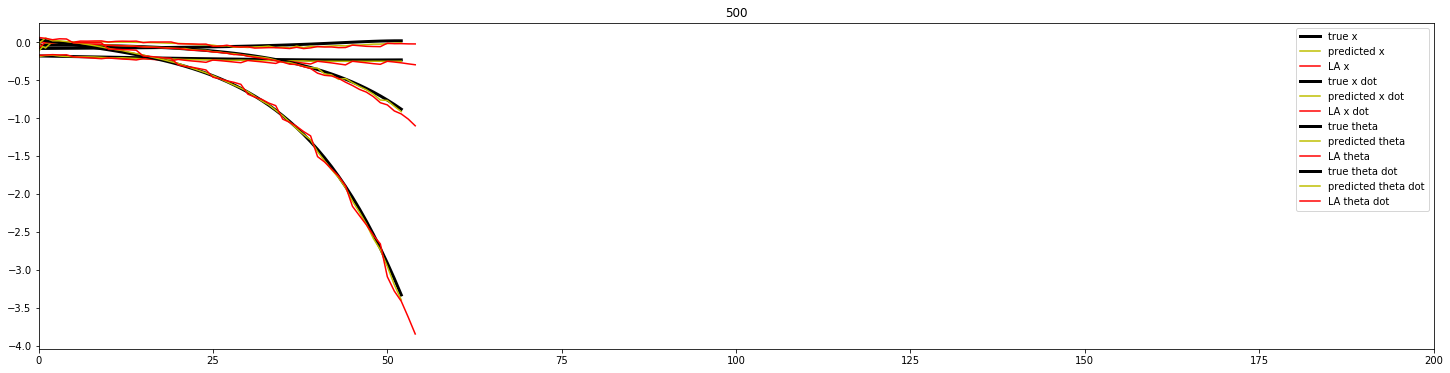

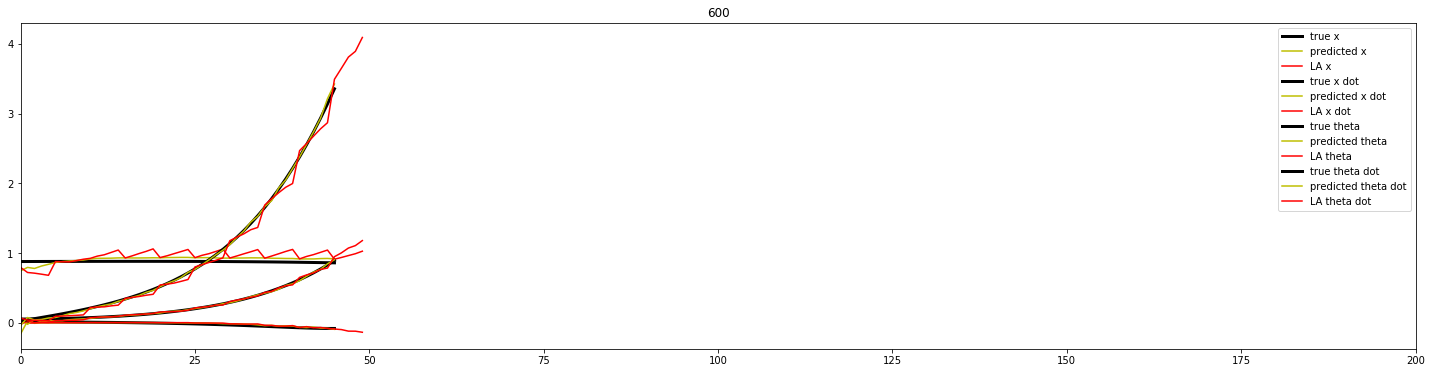

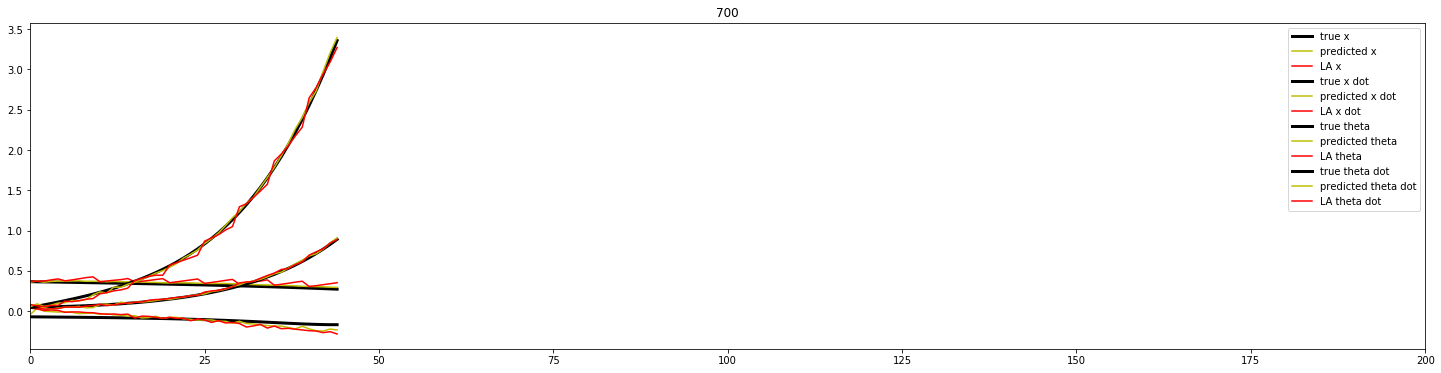

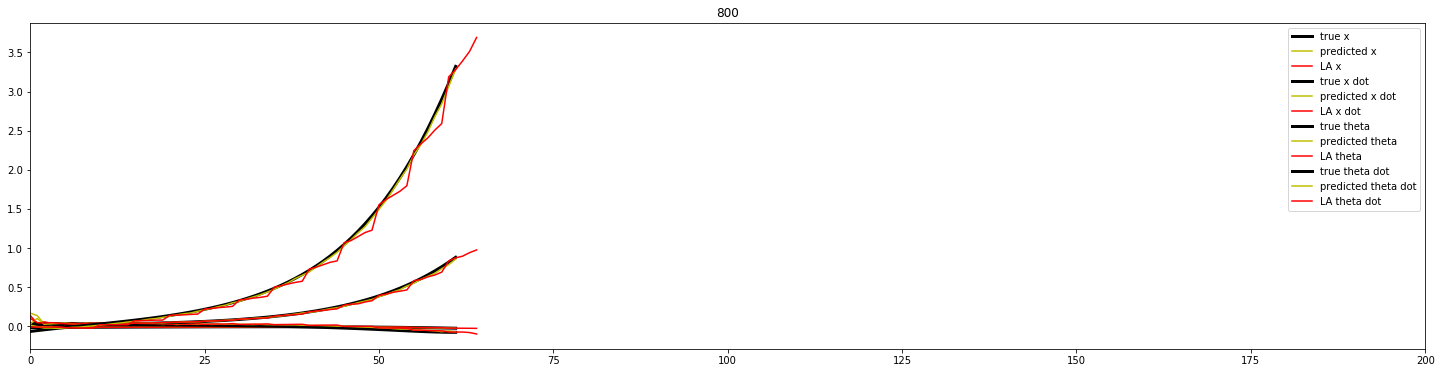

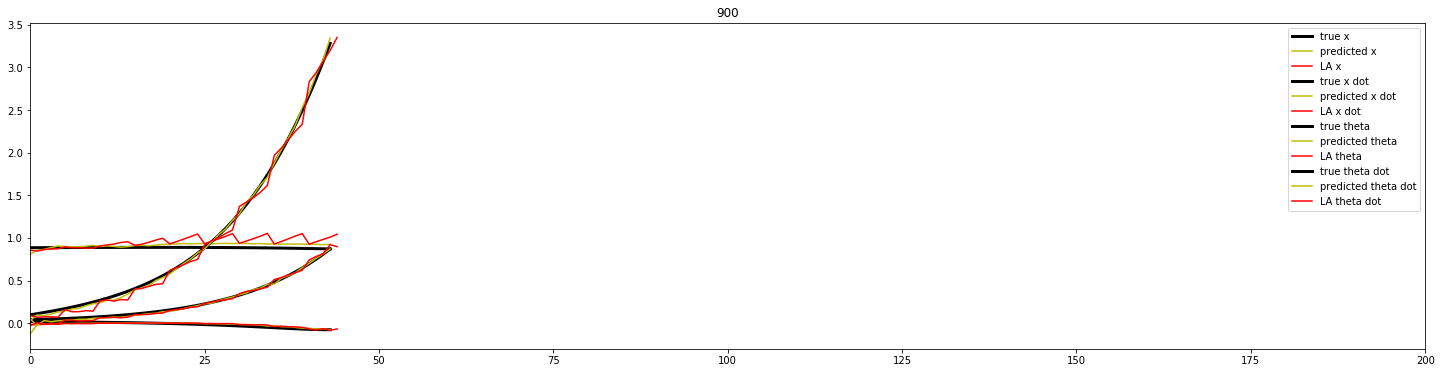

In [12]:
lookaheadlabels = ['LA x', 'LA x dot', 'LA theta', 'LA theta dot']
predictedlabels = ['predicted x', 'predicted x dot', 'predicted theta', 'predicted theta dot']
truelabels = ['true x','true x dot', 'true theta','true theta dot']
array_actual_trajectories = np.array(actual_trajectories)
for k in range(0,global_epoch,100):
    plt.figure(figsize=(25,6))
    for j in range(4):
        plt.plot(np.squeeze(np.array([array_actual_trajectories[k][j][i] for i in range(len(array_actual_trajectories[k][j]))])), label = truelabels[j], color = 'k',linewidth=3)
        plt.plot(predicted_trajectories[k].numpy()[j], label=predictedlabels[j], color = 'y')
        plt.plot(np.array(look_ahead_predictions[k]).T[j], label = lookaheadlabels[j], color = 'r')
#     plt.legend(['x', 'x dot','theta', 'theta dot', 'x', 'x dot','theta', 'theta dot'])
    plt.legend()
    plt.title(k)
    plt.xlim(0,200)
    plt.show()